In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
train_df = pd.read_csv("../Datasets/train.csv")
test_df = pd.read_csv("../Datasets/test.csv")

train_df.drop("Unnamed: 0", axis=1,inplace=True)
test_df.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
train_df.index = train_df["Date and time"]
test_df.index = test_df["Date and time"]

train_df.drop('Date and time', axis=1, inplace=True)
test_df.drop('Date and time', axis=1, inplace=True)

In [4]:
train_df

,Gear oil temperature (°C),Front bearing temperature (°C),Rear bearing temperature (°C),Gear oil inlet temperature (°C),Generator bearing front temperature (°C),Generator bearing rear temperature (°C),Rotor bearing temp (°C),Stator temperature 1 (°C)
Date and time,,,,,,,,
01-01-2020 00:00,56.972500,65.880001,65.382499,55.497500,38.277500,36.752500,27.182501,58.377500
01-01-2020 00:10,56.695001,64.602500,64.712498,55.230000,39.145000,37.037499,27.190001,58.952500
01-01-2020 00:20,56.640000,64.740000,64.917499,55.107500,39.897500,37.347500,27.197501,59.660000
01-01-2020 00:30,56.432500,63.137500,63.990000,55.135000,40.625000,37.752500,27.140001,60.550000
01-01-2020 00:40,56.169998,62.037500,63.525000,54.915000,41.252500,38.362500,27.100000,61.694999
...,...,...,...,...,...,...,...,...
31-12-2020 23:10,50.830000,57.390000,59.570001,50.375000,36.480000,36.380000,23.212501,57.970000
31-12-2020 23:20,50.792500,56.595000,58.920000,50.307499,37.410000,36.672500,23.297499,58.472500
31-12-2020 23:30,50.742500,57.007500,59.552501,50.109999,38.177500,37.022499,23.299999,59.207500


In [5]:
test_df

,Gear oil temperature (°C),Front bearing temperature (°C),Rear bearing temperature (°C),Gear oil inlet temperature (°C),Generator bearing front temperature (°C),Generator bearing rear temperature (°C),Rotor bearing temp (°C),Stator temperature 1 (°C)
Date and time,,,,,,,,
01-01-2021 00:00,17.442500,17.300000,15.615000,12.577500,16.700001,10.675000,10.700000,17.779999
01-01-2021 00:10,18.220000,17.172501,15.445000,13.687500,16.535000,10.600000,10.687500,17.600000
01-01-2021 00:20,18.230000,17.102500,15.490000,14.760000,16.427500,10.430000,10.600000,17.532500
01-01-2021 00:30,17.485000,17.035000,15.340000,12.520000,16.320000,10.327500,10.510000,17.495000
01-01-2021 00:40,17.785000,16.885000,15.220000,13.002500,16.200001,10.285000,10.380000,17.400000
...,...,...,...,...,...,...,...,...
16-06-2021 07:40,57.497499,65.087501,66.695001,56.230000,47.552500,47.002500,31.000000,64.980001
16-06-2021 07:50,57.591667,64.636111,66.141666,56.108333,44.544444,45.872222,31.000000,63.244444
16-06-2021 08:00,57.375001,63.017500,65.092500,55.575000,41.740000,44.455000,31.062500,60.907500


In [6]:
def data_into_timeseries(df):
    for i in df.columns:
        data = pd.DataFrame(df[i])
        data.index = df.index
        data.rename(columns={i:'y'}, inplace=True)
        data['x1']= data['y'].shift()
        data['x2']= data['y'].shift(2)
        data['x3']= data['y'].shift(3)
        data['x4']= data['y'].shift(4)
        data['x5']= data['y'].shift(5)
        data['x6']= data['y'].shift(6)

        data = data.iloc[6:]
        
        data.to_csv("../Datasets/Timeseries Data/Train/" + i + ".csv")
        
        print("Saved", i + ".csv")

In [7]:
data_into_timeseries(train_df)

Saved Gear oil temperature (°C).csv
Saved Front bearing temperature (°C).csv
Saved Rear bearing temperature (°C).csv
Saved Gear oil inlet temperature (°C).csv
Saved Generator bearing front temperature (°C).csv
Saved Generator bearing rear temperature (°C).csv
Saved Rotor bearing temp (°C).csv
Saved Stator temperature 1 (°C).csv


In [7]:
def forcasting_model(path):
    # LSTM Model
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1, 6)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mse')
    model.summary()

    # Saving the LSTM Model
    model_json = model.to_json()
    with open("../Model Files/LSTM Model/model.json", "w") as json_file:
        json_file.write(model_json)

    # Training LSTM Model on every Feature
    for i in os.listdir(path):
        data = pd.read_csv(path + i)
        data.drop("Date and time", axis=1, inplace=True)

        # Reshaping the data
        x_train = data.drop(['y'], axis=1)
        x_train = x_train.values.reshape((x_train.values.shape[0], 1, x_train.values.shape[1]))
        y_train = data['y'].values

        # Training on 100 epochs
        print("\nTraining the LSTM Mode for", i)
        history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.25, shuffle=True).history

        # Plotting the Model Loss per epoch
        fig, ax = plt.subplots(figsize=(14, 6), dpi=80,)
        ax.plot(history['loss'], 'b', label='Train', linewidth=2)
        ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
        ax.set_title(f'Model loss for {i}', fontsize=16)
        ax.set_ylabel('Loss (mae)')
        ax.set_xlabel('Epoch')
        ax.legend(loc='upper right')
        plt.show()

        # Saving the Weights of each trained Model
        model.save_weights("../Model Files/LSTM Model/" + i + ".h5")
        print("Saved the Model Weights for", i, "\n")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             18176     
                                                                 
 lstm_1 (LSTM)               (None, 50)                23000     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 41,227
Trainable params: 41,227
Non-trainable params: 0
_________________________________________________________________

Training the LSTM Mode for Front bearing temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 14s 3ms/step - loss: 124.7296 - val_loss: 5.0027
Epoch 2/100
3656/3656 [==============================] - 10s 3ms/step - loss: 3.5202 - val_loss: 4.3500
Epoch 3/100
3656/3656 [====================

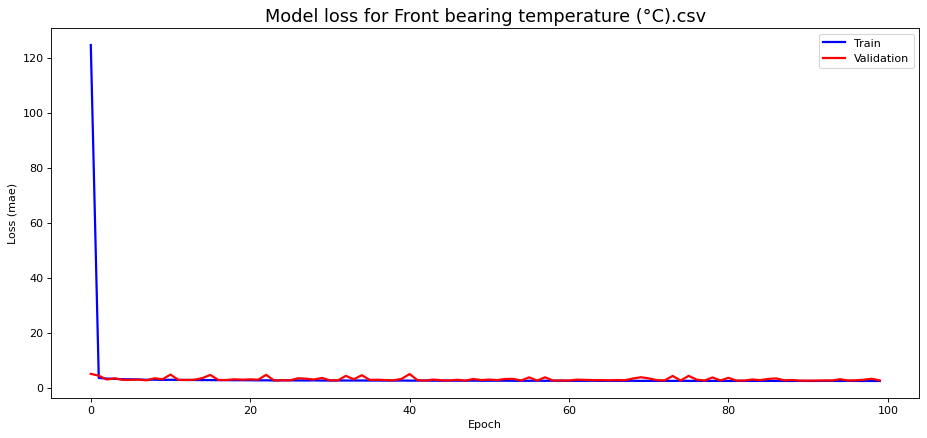

Saved the Model Weights for Front bearing temperature (°C).csv 


Training the LSTM Mode for Gear oil inlet temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.8998 - val_loss: 13.3553
Epoch 2/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.5843 - val_loss: 13.2150
Epoch 3/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.4906 - val_loss: 16.0662
Epoch 4/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.4523 - val_loss: 13.2214
Epoch 5/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.4178 - val_loss: 13.0679
Epoch 6/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.4007 - val_loss: 13.9681
Epoch 7/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.4002 - val_loss: 13.0737
Epoch 8/100
3656/3656 [==============================] - 9s 3ms/step - loss: 14.3554 - val_loss: 13.9635
Epoch 9/100
3656/3656 [========

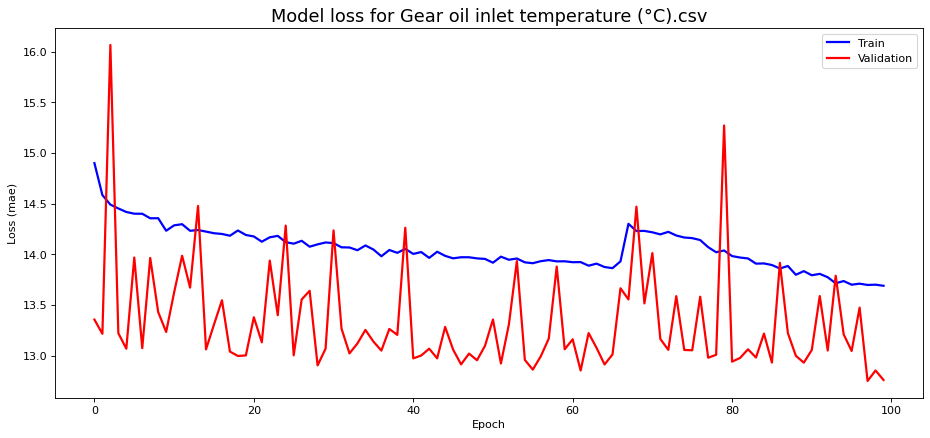

Saved the Model Weights for Gear oil inlet temperature (°C).csv 


Training the LSTM Mode for Gear oil temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.1308 - val_loss: 0.9858
Epoch 2/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.0648 - val_loss: 1.1004
Epoch 3/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.0538 - val_loss: 0.8954
Epoch 4/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.0536 - val_loss: 0.9478
Epoch 5/100
3656/3656 [==============================] - 11s 3ms/step - loss: 1.0407 - val_loss: 1.1260
Epoch 6/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.0440 - val_loss: 0.9286
Epoch 7/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.0419 - val_loss: 1.1126
Epoch 8/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.0405 - val_loss: 0.9460
Epoch 9/100
3656/3656 [=====================

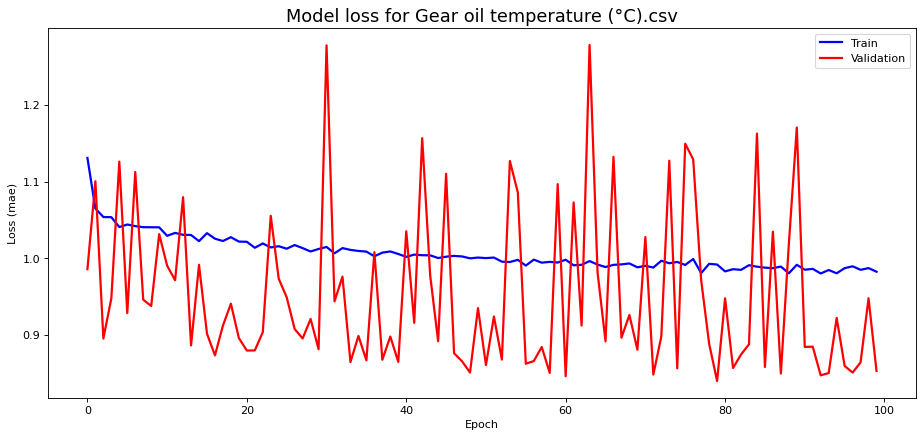

Saved the Model Weights for Gear oil temperature (°C).csv 


Training the LSTM Mode for Generator bearing front temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.7477 - val_loss: 0.7552
Epoch 2/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.6863 - val_loss: 1.0281
Epoch 3/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.6751 - val_loss: 0.6856
Epoch 4/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.6691 - val_loss: 0.6829
Epoch 5/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.6683 - val_loss: 0.6768
Epoch 6/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.6635 - val_loss: 0.6915
Epoch 7/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.6583 - val_loss: 0.7268
Epoch 8/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.6594 - val_loss: 0.7439
Epoch 9/100
3656/3656 [============

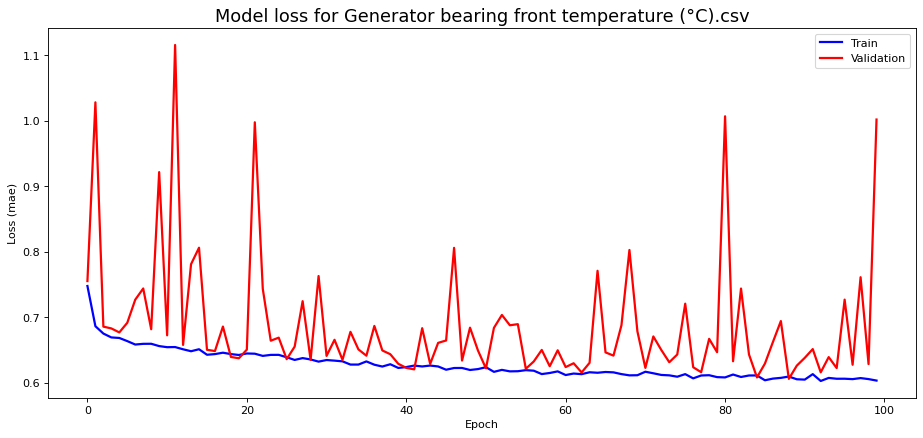

Saved the Model Weights for Generator bearing front temperature (°C).csv 


Training the LSTM Mode for Generator bearing rear temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.2163 - val_loss: 0.2003
Epoch 2/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.2052 - val_loss: 0.1909
Epoch 3/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.2005 - val_loss: 0.2232
Epoch 4/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.2002 - val_loss: 0.2258
Epoch 5/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.1963 - val_loss: 0.1975
Epoch 6/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.1965 - val_loss: 0.1999
Epoch 7/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.1957 - val_loss: 0.2032
Epoch 8/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.1940 - val_loss: 0.1857
Epoch 9/100
3656/3656 [

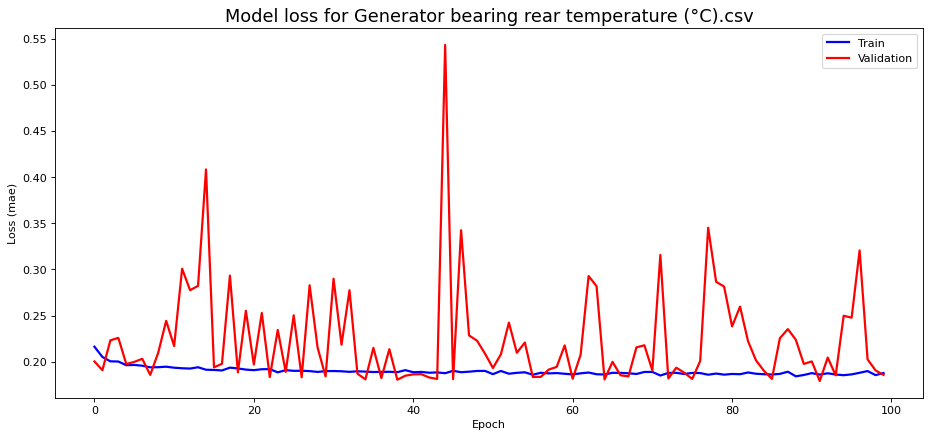

Saved the Model Weights for Generator bearing rear temperature (°C).csv 


Training the LSTM Mode for Rear bearing temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.8271 - val_loss: 2.7045
Epoch 2/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.6631 - val_loss: 2.8317
Epoch 3/100
3656/3656 [==============================] - 9s 3ms/step - loss: 2.6580 - val_loss: 2.5961
Epoch 4/100
3656/3656 [==============================] - 9s 3ms/step - loss: 2.6425 - val_loss: 2.7795
Epoch 5/100
3656/3656 [==============================] - 9s 3ms/step - loss: 2.6424 - val_loss: 2.9318
Epoch 6/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.6357 - val_loss: 2.5765
Epoch 7/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.6175 - val_loss: 2.5411
Epoch 8/100
3656/3656 [==============================] - 10s 3ms/step - loss: 2.5963 - val_loss: 2.9596
Epoch 9/100
3656/3656 [============

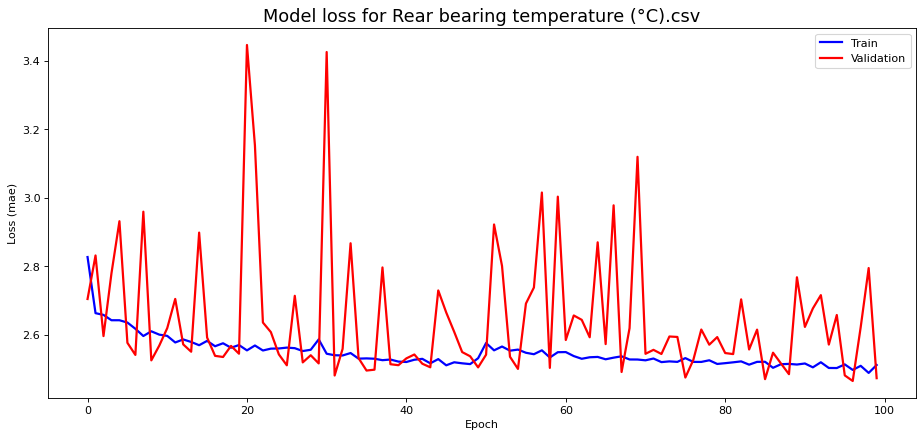

Saved the Model Weights for Rear bearing temperature (°C).csv 


Training the LSTM Mode for Rotor bearing temp (°C).csv
Epoch 1/100
3656/3656 [==============================] - 10s 3ms/step - loss: 0.0361 - val_loss: 0.0139
Epoch 2/100
3656/3656 [==============================] - 9s 3ms/step - loss: 0.0175 - val_loss: 0.0107
Epoch 3/100
3656/3656 [==============================] - 9s 2ms/step - loss: 0.0145 - val_loss: 0.0117
Epoch 4/100
3656/3656 [==============================] - 9s 2ms/step - loss: 0.0135 - val_loss: 0.0095
Epoch 5/100
3656/3656 [==============================] - 9s 2ms/step - loss: 0.0132 - val_loss: 0.0116
Epoch 6/100
3656/3656 [==============================] - 9s 2ms/step - loss: 0.0134 - val_loss: 0.0099
Epoch 7/100
3656/3656 [==============================] - 9s 2ms/step - loss: 0.0130 - val_loss: 0.0092
Epoch 8/100
3656/3656 [==============================] - 9s 2ms/step - loss: 0.0131 - val_loss: 0.0095
Epoch 9/100
3656/3656 [==============================] 

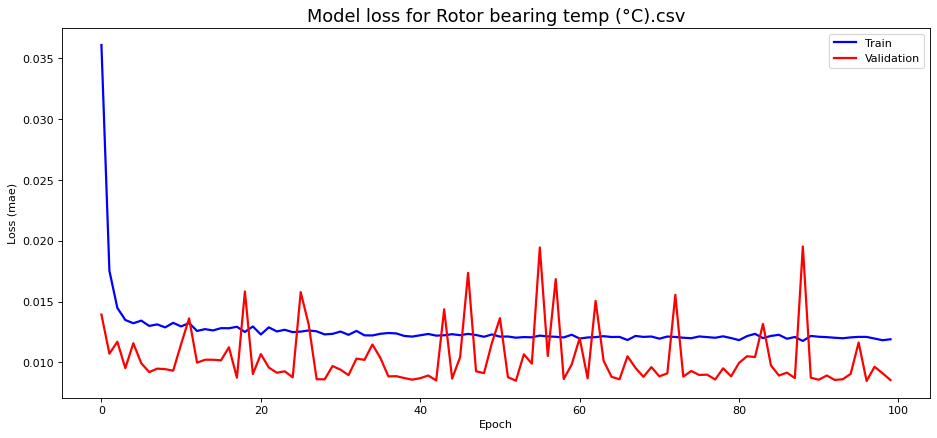

Saved the Model Weights for Rotor bearing temp (°C).csv 


Training the LSTM Mode for Stator temperature 1 (°C).csv
Epoch 1/100
3656/3656 [==============================] - 9s 3ms/step - loss: 2.3667 - val_loss: 1.3154
Epoch 2/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.3384 - val_loss: 1.3491
Epoch 3/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.2743 - val_loss: 1.4410
Epoch 4/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.2372 - val_loss: 1.1167
Epoch 5/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.2063 - val_loss: 1.2599
Epoch 6/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.1751 - val_loss: 1.8306
Epoch 7/100
3656/3656 [==============================] - 9s 3ms/step - loss: 1.1743 - val_loss: 1.0993
Epoch 8/100
3656/3656 [==============================] - 10s 3ms/step - loss: 1.1692 - val_loss: 1.1239
Epoch 9/100
3656/3656 [==============================] - 10

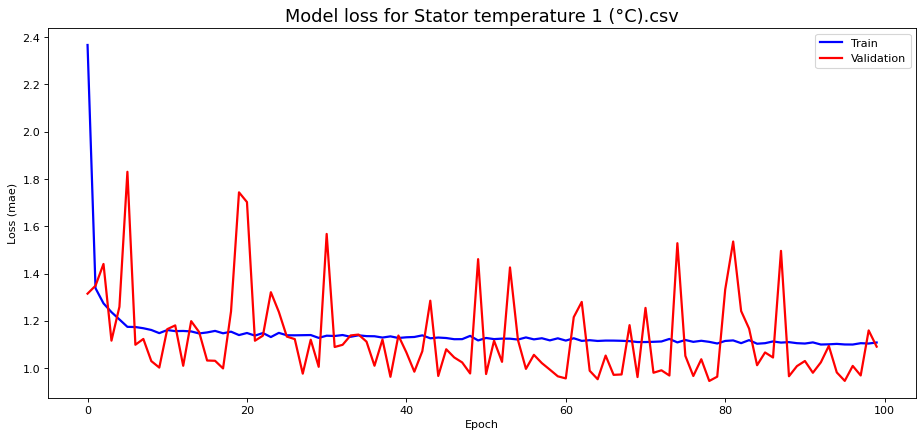

Saved the Model Weights for Stator temperature 1 (°C).csv 



In [8]:
forcasting_model("../Datasets/Timeseries Data/Train/")

New Model for - Front bearing temperature (°C).csv Gear oil inlet temperature (°C).csv Rear bearing temperature (°C).csv

In [7]:
def forcasting_specific_models(path_to_csv):
    # LSTM Model
    model2 = Sequential()
    model2.add(LSTM(128, return_sequences=True, input_shape=(1, 6)))
    model2.add(LSTM(64, activation='relu'))
    model2.add(Dense(1, activation='relu'))
    model2.compile(optimizer='adam', loss='mse')
    model2.summary()

    # Saving the LSTM Model
    model2_json = model2.to_json()
    with open("../Model Files/LSTM Model/model2.json", "w") as json_file:
        json_file.write(model2_json)

    # Training LSTM Model 
    data = pd.read_csv(path_to_csv)
    data.drop("Date and time", axis=1, inplace=True)
    # Reshaping the data
    x_train = data.drop(['y'], axis=1)
    x_train = x_train.values.reshape((x_train.values.shape[0], 1, x_train.values.shape[1]))
    y_train = data['y'].values

    i = path_to_csv.replace("../Datasets/Timeseries Data/", "")

    # Training on 100 epochs
    print("\nTraining the LSTM Model for", i)
    history = model2.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.25, shuffle=True).history

    # Plotting the Model Loss per epoch
    fig, ax = plt.subplots(figsize=(14, 6), dpi=80,)
    ax.plot(history['loss'], 'b', label='Train', linewidth=2)
    ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
    ax.set_title(f'Model loss for {i}', fontsize=16)
    ax.set_ylabel('Loss (mae)')
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper right')
    plt.show()

    # # Saving the Weights of each trained Model
    # model2.save_weights("../Model Files/LSTM Model/" + i + ".h5")
    # print("Saved the Model Weights for", i, "\n")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            69120     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 118,593
Trainable params: 118,593
Non-trainable params: 0
_________________________________________________________________

Training the LSTM Model for Gear oil inlet temperature (°C).csv
Epoch 1/100
3656/3656 [==============================] - 15s 3ms/step - loss: 39.8578 - val_loss: 14.3247
Epoch 2/100
3656/3656 [==============================] - 12s 3ms/step - loss: 15.6299 - val_loss: 13.8351
Epoch 3/100
3656/3656 [==============

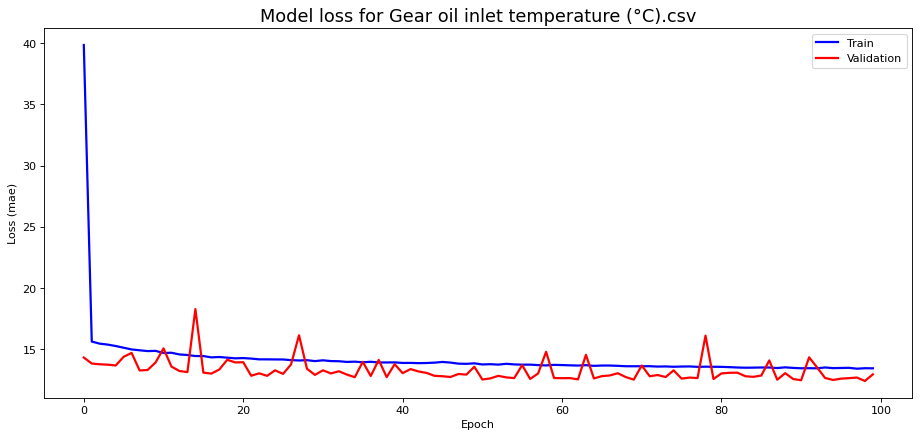

Saved the Model Weights for Gear oil inlet temperature (°C).csv 



In [8]:
forcasting_specific_models("../Datasets/Timeseries Data/Gear oil inlet temperature (°C).csv")